{% include toc title="In This Lesson" icon="file-text" %}

This lesson supports the graduate student additional homework assignment component 
to create a final subsetted and aggregated plot. Here we will plot USGS precipitation time 
series data, however, there are several cleaning setps that you will need to consider
when working with these data including:

1. these data were collected over several decades and the data were not always collected consistently
1. sometimes there are multiple data points per day which need to be aggragated to find a total precipitation value
1. the data are also not cleaned. You will find heading names that may not be meaningful, and other issues with the data that need to be explored

Working with these data is more akin to working with real data that you will download 
and need to work with rather than data that has been cleaned for you by your instructor!

You will use the skills
that you learned in the previous lessons, coupled with the skills in this lesson
to process the data.

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:

* Aggregate data by a day in `Python`
* View data.frame column names and clean-up / rename dataframe column names.

### Things You'll Need To Complete This Lesson

You need `Python` and `Jupyter notebooks` to complete this tutorial. Also you should have
an `earth-analytics` directory setup on your computer with a `/data`
directory with it.

#### Data Download

Please download the data (used throughout this series of lessons) if you don't already have it on your computer.

[<i class="fa fa-download" aria-hidden="true"></i> Download Week 2 Data](https://ndownloader.figshare.com/files/7426738){:data-proofer-ignore='' .btn }

</div>


## Work with Precipitation Data

To get started we will load the needed Python libraries.
Notice below i've also set a plot style. This is optional!

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.ion()

# set default figure size
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

# set working directory -- can i set this as a hidden line of code and then have my usual teaser commented out set your wd line??
os.chdir("/Users/lewa8222/Documents/earth-analytics/")
# set matplotlib styles
plt.style.use('ggplot')

## Import Precipitation Data

We will use the `805333-precip-daily-1948-2013.csv` dataset for this assignment.
in this analysis. This dataset contains the precipitation values collected daily
from the COOP station 050843 in Boulder, CO for 1 January 2003 through 31 December 2013.

To begin, import the data into Python and then view the data structure.


In [46]:
# import data - this code should be hidden
# Chris - anywhere you see echo=FALSE in the code that means hide the code.
precip_file = 'data/week2/precipitation/805333-precip-daily-1948-2013.csv'
precip_boulder = pd.read_csv(precip_file)
precip_boulder.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480801 01:00,0.00,g,
1,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480802 15:00,0.05,,
2,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480803 09:00,0.01,,
3,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480803 14:00,0.03,,
4,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480803 15:00,0.03,,


In [47]:
precip_boulder.dtypes

STATION              object
STATION_NAME         object
ELEVATION            object
LATITUDE             object
LONGITUDE            object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

## About the Data

The structure of the data is similar to what you saw in previous lessons. The `HPCP`
column contains the total precipitation given in inches, recorded
for the hour ending at the time specified by DATE. There is a designated missing
data value of `999.99`. Note that if there is no data in a particular hour, then 
no value is recorded.

The metadata for this file is located in your week2 directory:
`PRECIP_HLY_documentation.pdf` file that can be downloaded along with the data.
(Note, as of Sept. 2016, there is a mismatch in the data downloaded and the
documentation. The differences are in the units and missing data value:
inches/999.99 (standard) or millimeters/25399.75 (metric)).

### NoData Values

Be sure to explore the data closely. If there are no data values in the data, make sure to adjust your
data import code above to account for no data values. Then determine how many no
data values you have in your dataset.

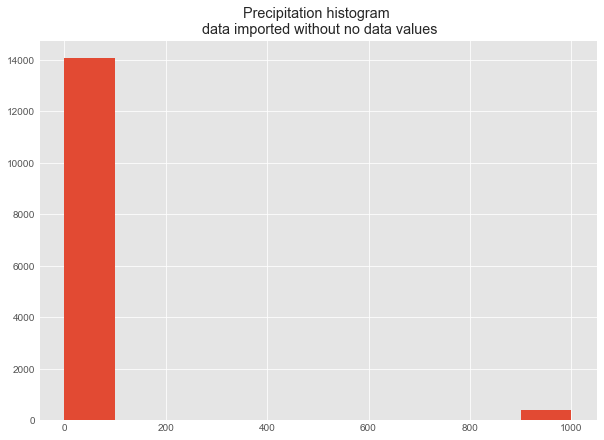

In [48]:
fig, ax = plt.subplots()
# note that this won't plot without removing the NA values -- be sure to teach this earlier....
ax.hist(precip_boulder['HPCP'].dropna())
ax.set(title="Precipitation histogram \n data imported without no data values");

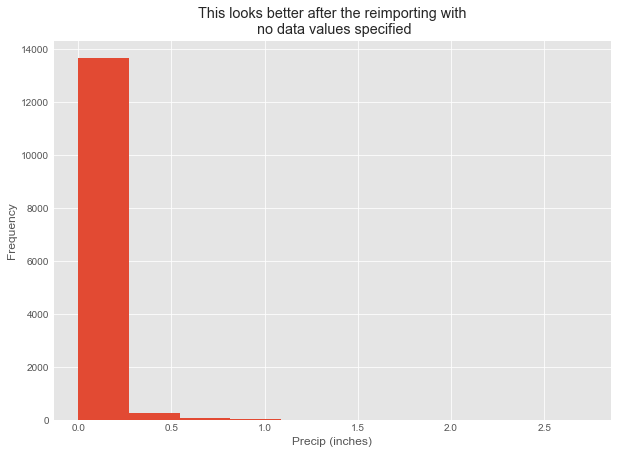

In [49]:
# import data and include on data value assignment
precip_boulder = pd.read_csv(precip_file, 
                             na_values=[999.99])

# then plot the data 
fig, ax = plt.subplots()
ax.hist(precip_boulder['HPCP'].dropna())
ax.set(title="This looks better after the reimporting with\n no data values specified",
       xlabel="Precip (inches)", ylabel="Frequency");

In [17]:
print("How many NA values are there?")
print(precip_boulder.isnull().sum())

How many NA values are there?
STATION               0
STATION_NAME          0
ELEVATION             0
LATITUDE              0
LONGITUDE             0
DATE                  0
HPCP                401
Measurement Flag      0
Quality Flag          0
dtype: int64


### Convert Date and Time

Compared to the data that we worked with in previous lessons where we were only working with dates, these data contains dates and times. Lucky for us, pandas is very good at recognizing date and datetime formats. 

In [50]:
precip_boulder['DATE'] = pd.to_datetime(precip_boulder['DATE'])
precip_boulder['DATE'].head()

0   1948-08-01 01:00:00
1   1948-08-02 15:00:00
2   1948-08-03 09:00:00
3   1948-08-03 14:00:00
4   1948-08-03 15:00:00
Name: DATE, dtype: datetime64[ns]

## Plot Precipitation Data

Next, let's have explore the data further by plotting it. Format the plot using
the colors, labels, etc that are most clear and look the best. Your plot does not
need to look like the one below!


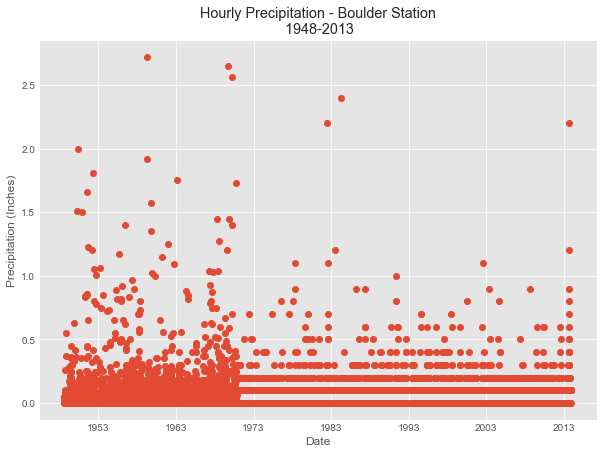

In [51]:
fig, ax = plt.subplots()
ax.plot('DATE', 'HPCP', 'o', data=precip_boulder)
ax.set(xlabel='Date', ylabel='Precipitation (Inches)',
       title="Hourly Precipitation - Boulder Station\n 1948-2013");

## Differences in the data

The plot above brings to light a visual difference in the data that seems to begin around 1970. What do you notice? Any ideas what might be causing the notable difference in the plotted data through time?


In [54]:
# round the data 
precip_boulder['HPCP_round'] = precip_boulder['HPCP'].apply(np.round, decimals=1)

In [55]:
precip_boulder['HPCP_round']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       NaN
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.1
24       0.1
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
14446    0.1
14447    0.2
14448    0.1
14449    0.1
14450    0.1
14451    0.1
14452    0.1
14453    0.1
14454    0.1
14455    0.1
14456    0.1
14457    0.1
14458    0.1
14459    0.1
14460    0.2
14461    0.0
14462    0.1
14463    0.1
14464    0.1
14465    0.1
14466    0.0
14467    0.1
14468    0.1
14469    0.1
14470    0.1
14471    NaN
14472    NaN
14473    0.1
14474    NaN
14475    NaN
Name: HPCP_round, dtype: float64

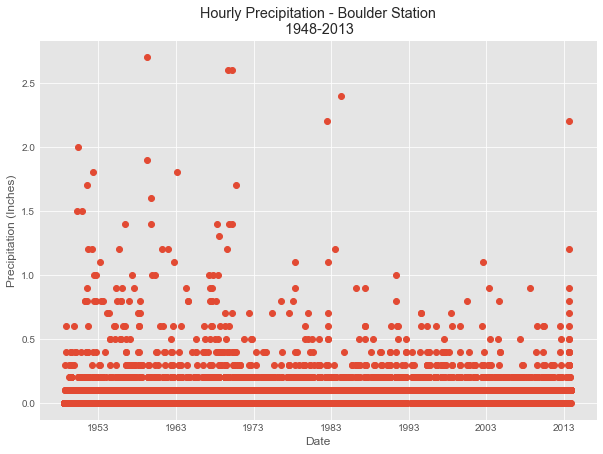

In [56]:
# drop na is very important... need to ensure this is taught in earlier lessons! 
fig, ax = plt.subplots()
ax.plot('DATE', 'HPCP_round', 'o', data=precip_boulder.dropna())
ax.set(xlabel='Date', ylabel='Precipitation (Inches)',
       title="Hourly Precipitation - Boulder Station\n 1948-2013");

## Subset the data

For our research project, we only need to explore 30 years of data.
There's no need to work with the entire dataset so let's do the following:

1. Aggregate the precipitation totals (sum) by day.
1. Subset the data for 30 years (we learned how to do this in a previous lesson).

#### Aggregate and summarize data

To aggregate data by a particular variable or time period, we can create a new object 
called in our dataset called day. We will take all of the values for each day and add them
using the `.sum()` function.  

We use the `mutate()` function to add a new column called **day** to a new data.frame called **daily_sum_precip**. Note that we used `as.Date()` to just grab the dates rather than dates and times which are stored in the POSIX format.



In [58]:
precip_boulder.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag,HPCP_round
0,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,1948-08-01 01:00:00,0.00,g,,0.0
1,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,1948-08-02 15:00:00,0.05,,,0.0
2,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,1948-08-03 09:00:00,0.01,,,0.0
3,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,1948-08-03 14:00:00,0.03,,,0.0
4,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,1948-08-03 15:00:00,0.03,,,0.0


In [80]:
# Create a new dataframe with resample or aggretage the data by day 
precip_boulder_day = precip_boulder.resample(rule='M', on='DATE').sum()
# subset the data for the years 2003 - 2013
precip_boulder_day = precip_boulder_day.query('DATE >= 2003 and DATE <= 2013')

precip_boulder_day.tail(10)

,HPCP,HPCP_round
DATE,,
2012-03-31,0.0,0.0
2012-04-30,1.1,1.1
2012-05-31,1.5,1.5
2012-06-30,0.0,0.0
2012-07-31,2.8,2.8
2012-08-31,0.2,0.2
2012-09-30,1.7,1.7
2012-10-31,1.1,1.1
2012-11-30,0.3,0.3


In [94]:
# above the date becomes an index. turn it into a column for plotting 
precip_boulder_day['theDate'] = precip_boulder_day.index
precip_boulder_day.tail()

precip_boulder_day.dtypes
#precip_boulder_day["DATE"]
#precip_boulder_day['DATE'] = pd.to_datetime(precip_boulder_day['DATE'])
#precip_boulder_day.Date = pd.to_datetime(precip_boulder_day['DATE'], format='%Y-%m-%d %H:%M:%S.%f') 
#precip_boulder_day.set_index('DATE', inplace=True)


# why is the date missing here? it's almost as if it's in another space loking at the tail results above...
#precip_boulder_day.dtypes

HPCP                 float64
HPCP_round           float64
theDate       datetime64[ns]
dtype: object

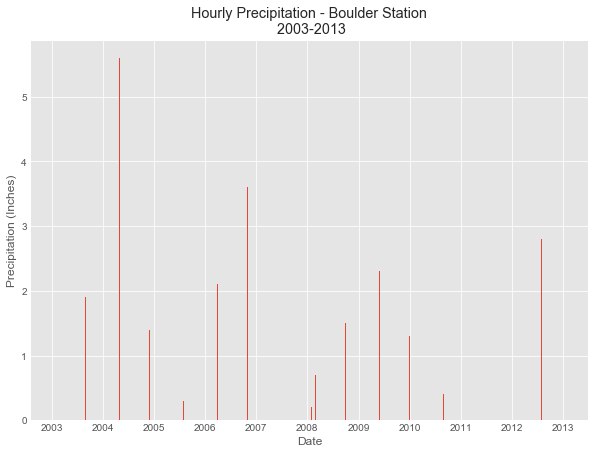

In [98]:
# THIS IS PANDAS AGAIN... removed reset_inde
fig, ax = plt.subplots()
ax.bar(precip_boulder_day['theDate'].values, precip_boulder_day['HPCP_round'].values)
ax.set(xlabel='Date', ylabel='Precipitation (Inches)',
       title="Hourly Precipitation - Boulder Station\n 2003-2013");

In [30]:
# ```{r plot-daily, echo=F, warning=F, fig.cap="Daily precip plot"}

# precPlot_daily1 <- ggplot(data=precip.boulder,  # the data frame

#       aes(DATE, HPCP)) +   # the variables of interest

#       geom_bar(stat="identity") +   # create a bar graph

#       xlab("Date") + ylab("Precipitation (Inches)") +  # label the x & y axes

#       ggtitle("Daily Precipitation - Boulder Station\n 2003-2013")  # add a title



# precPlot_daily1



# ```




Next we `summarize()` the precipitation column (total_precip) - grouped by day.

What this means is that we ADD UP all of the values for each day to get a grand

total amount of precipitation each day.






In [91]:
# Not sure how the stuff below is different from the stuff above, should double check!
daily_sum_precip = precip_boulder.resample('D', on='DATE').sum()
daily_sum_precip.head()

,HPCP,HPCP_round
DATE,,
1948-08-01,0.00,0.0
1948-08-02,0.05,0.0
1948-08-03,0.07,0.0
1948-08-04,0.14,0.0
1948-08-05,0.02,0.0


In [32]:
# ``` {r daily-summ}

# # use dplyr

# daily_sum_precip <- precip.boulder %>%

#   mutate(day = as.Date(DATE, format="%Y-%m-%d")) %>%

#   group_by(day) %>% # group by the day column

#   summarise(total_precip=sum(HPCP)) # calculate the SUM of all precipitation that occured on each day



# # how large is the resulting data frame?

# nrow(daily_sum_precip)



# # view the results

# head(daily_sum_precip)



# # view column names

# names(daily_sum_precip)



# ```






Now plot the daily data.




In [33]:
# ``` {r daily-prec-plot, echo=F, warning=F, fig.cap="Daily precipitation for boulder"}

# # plot daily data

# precPlot_daily <- ggplot(daily_sum_precip, aes(day, total_precip)) +

#       geom_bar(stat="identity") +

#       xlab("Date") + ylab("Precipitation (inches)") +

#       ggtitle("Daily Precipitation - Boulder Station\n 2003-2013")



# precPlot_daily

# ```






Finally, plot a temporal subsets of the data from 2000-2013. We learned how to

do this in the previous lessons.





Now we can easily see the dramatic rainfall event in mid-September!



<i class="fa fa-star"></i> **R Tip:** If you are using a date-time class, instead

of just a date class, you need to use `scale_x_datetime()`.

{: .notice}



#### Subset The Data



If we wanted to, we could subset this data set using the same code that we used

previously to subset! An example of the subsetted plot is below.




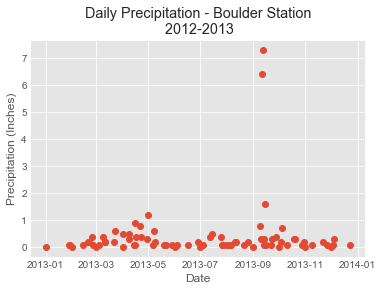

In [34]:
this_daily_sum = daily_sum_precip.query('DATE >= "2012-12-31" and DATE <= "2013-12-31"')

fig, ax = plt.subplots()
ax.plot('DATE', 'HPCP_round', 'o', data=this_daily_sum.reset_index())
ax.set(xlabel='Date', ylabel='Precipitation (Inches)',
       title="Daily Precipitation - Boulder Station\n 2012-2013");

In [35]:
# ``` {r subset-data, echo=F, warning='hide', fig.cap="final precip plot daily sum"}



# # use dplyr

# daily_sum_precip_subset <- daily_sum_precip %>%

#   filter(day >= as.Date('2012-12-31') & day <= as.Date('2013-12-31'))





# # create new plot

# precPlot_30yrs <- ggplot(daily_sum_precip_subset, aes(day, total_precip)) +

#   geom_bar(stat="identity") +

#   xlab("Date") + ylab("Precipitation (inches)") +

#   ggtitle("Daily Total Precipitation 2012 - 2013 for Boulder Creek")



# precPlot_30yrs



# ```
